In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.colors as colors
import matplotlib
from matplotlib.colors import LogNorm
import matplotlib.transforms as mtransforms
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib.ticker as ticker
from ase.io import read
#plt.rcParams['text.usetex'] = True
%matplotlib inline

# Plot Figure 2

Text(4.43, 4.1, '30 K stacking')

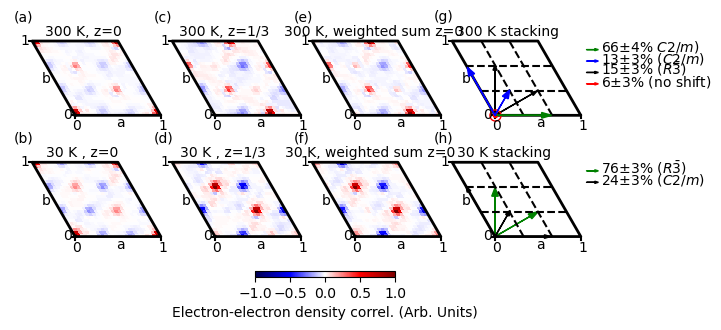

In [3]:
# Diffuse scattering deltaPDF, 30K and 300K
# Plot the z=1/3 cut encoding the interlayer shifts
# Compare with weighted sum of z=0 cut, shifted by different amounts


fig = plt.figure(figsize=(2*(3+3/8)+0.25, (3+3/8+0.125)/1.18 ))
ax1 = fig.add_axes([0,0,1,1])
ax1.set_axis_off()

# Choose which cell
x = 3.0
y = 3.0
z=0.333

dely = 1.7


# 30K, SRO
# Panel d
datfile = np.load('30_sro.npz')
xarr = datfile['x']
yarr = datfile['y']
sro_dat = datfile['arr']
im1 = ax1.pcolormesh(xarr, yarr,  sro_dat/np.amax(sro_dat), shading='nearest', cmap='seismic')
transf = mtransforms.Affine2D().skew_deg(-26.5651,0).translate(0, 0)
trans_data = transf + ax1.transData
im1.set_transform(trans_data)


# Panel b
datfile = np.load('30_sro_z0.npz')
xarr = datfile['x']
yarr = datfile['y']
sro_z0 = datfile['arr']
im1a = ax1.pcolormesh(xarr, yarr,  sro_z0/np.amax(sro_z0), shading='nearest', cmap='seismic')
transf = mtransforms.Affine2D().skew_deg(-26.5651,0).translate(-1.7, 0)
trans_data = transf + ax1.transData
im1a.set_transform(trans_data)

# Panel f
A1 = 1
B1 = 0.308
sro_z0a = sro_z0[:-1,:-1]
combo = A1*np.roll(sro_z0a,[16,8], axis=(0,1)) + np.roll(sro_z0a,[8,16], axis=(0,1))
combo += B1*(np.roll(sro_z0a,[16,0], axis=(0,1)) + np.roll(sro_z0a,[8,8], axis=(0,1))+ np.roll(sro_z0a,[0,16], axis=(0,1)))
combo1 = np.zeros((25,25))
combo1[:-1,:-1] += combo
combo1[:-1,-1] += combo[:,0]
combo1[-1,:-1] += combo[0,:]
combo1[-1,-1] += combo[0,0]
im2 = ax1.pcolormesh(xarr, yarr,  combo1/np.amax(combo1), shading='nearest', cmap='seismic')
transf = mtransforms.Affine2D().skew_deg(-26.5651,0).translate(1.7, 0)
trans_data = transf + ax1.transData
im2.set_transform(trans_data)



# 300K, SRO
# Panel c
datfile = np.load('300_sro.npz')
xarr = datfile['x']
yarr = datfile['y']
sro_dat = datfile['arr']
im3 = ax1.pcolormesh(xarr, yarr,  sro_dat/np.amax(sro_dat), shading='nearest', cmap='seismic')
transf = mtransforms.Affine2D().skew_deg(-26.5651,0).translate(0, dely)
trans_data = transf + ax1.transData
im3.set_transform(trans_data)

# Panel a
datfile = np.load('300_sro_z0.npz')
xarr = datfile['x']
yarr = datfile['y']
sro_z0 = datfile['arr']
im3a = ax1.pcolormesh(xarr, yarr,  sro_z0/np.amax(sro_z0), shading='nearest', cmap='seismic')
transf = mtransforms.Affine2D().skew_deg(-26.5651,0).translate(-1.7, dely)
trans_data = transf + ax1.transData
im3a.set_transform(trans_data)

# Panel e
A = 1
B = 0.1984
C = 0.221
D = 0.09018
sro_z0a = sro_z0[:-1,:-1]
combo = A*np.roll(sro_z0a,[0,16], axis=(0,1)) #main monoclinic
combo += B*(np.roll(sro_z0a,[16,0], axis=(0,1))+ np.roll(sro_z0a,[8,8], axis=(0,1))) #secondary monoclinic
combo += C*(np.roll(sro_z0a,[8,16], axis=(0,1))+ np.roll(sro_z0a,[16,8], axis=(0,1))) #rhombohedral
combo += D*np.roll(sro_z0a,[0,0], axis=(0,1)) 
combo1 = np.zeros((25,25))
combo1[:-1,:-1] += combo
combo1[:-1,-1] += combo[:,0]
combo1[-1,:-1] += combo[0,:]
combo1[-1,-1] += combo[0,0]
im4 = ax1.pcolormesh(xarr, yarr,  combo1/np.amax(combo1), shading='nearest', cmap='seismic')
transf = mtransforms.Affine2D().skew_deg(-26.5651,0).translate(1.7, dely)
trans_data = transf + ax1.transData
im4.set_transform(trans_data)




mval = 1.
im1.set_clim(-mval,mval)
im3.set_clim(-mval,mval)
im1a.set_clim(-mval,mval)
im3a.set_clim(-mval,mval)

mval = 1.
im2.set_clim(-mval,mval)
im4.set_clim(-mval,mval)

# Various formatting and drawing outlines
x0 = 1.4896
y0 = 4.679
d = 8.5
ax1.set_xlim(-1,-1+d)
ax1.set_ylim(2,2+(d*3**-.5)/1.18)


def drawcell(x,y,ax, dotted):
    # Draw the outlines
    dx = 1./24
    off = 0.5 +0.02061
    ax.plot([x,x+1+dx,x+1+dx-off,x-off,x], [y, y, y+1+dx, y+1+dx,y], color='k', lw=2)
    if dotted:
        ax.plot([x-off*0.3333,x+1+dx-off*0.3333], [y+(1+dx)/3,y+(1+dx)/3], ls='dashed', color='k')
        ax.plot([x-off*0.666,x+1+dx-off*0.666], [y+2*(1+dx)/3,y+2*(1+dx)/3], ls='dashed', color='k')
        ax.plot([x+0.3333+dx/3, x+0.3333-off+dx/2], [y,y+1+dx], ls='dashed', color='k')
        ax.plot([x+0.6666+dx*2./3, x+0.6666-off+dx*2/3], [y,y+1+dx], ls='dashed', color='k')
    ax.plot([x,x], [y, y-dx], color='k', lw=1.5)
    ax.plot([x+1+dx,x+1+dx], [y, y-dx], color='k', lw=1.5)
    ax.plot([x-dx,x], [y, y], color='k', lw=1.5)
    ax.plot([x-dx-off,x-off], [y+1+dx, y+1+dx], color='k', lw=1.5)
    # Horizontal (a) axis
    ax.text(x-0.037,y-5*dx,'0')
    ax.text(x+1+dx-0.025,y-5*dx,'1')
    ax.text(x+0.5+dx-0.037,y-4*dx,'a')
    # Vertical (b) axis
    ax.text(x-3.5*dx,y-dx,'0')
    ax.text(x-3.5*dx-off,y+1-0.01,'1')
    ax.text(x-3.5*dx-off/2,y+0.5-0.05,'b')  
    return

# Draw the unit cells
drawcell(x0,y0,ax1, dotted=0)
drawcell(x0+1.7,y0,ax1, dotted=0)
drawcell(x0+1.7,y0-dely,ax1, dotted=0)
drawcell(x0,y0-dely,ax1, dotted=0)
drawcell(x0-1.7,y0,ax1, dotted=0)
drawcell(x0-1.7,y0-dely,ax1, dotted=0)
drawcell(x0+3.4,y0-dely,ax1, dotted=1)
drawcell(x0+3.4,y0,ax1, dotted=1)

# Draw the vectors for panel g (300K)
da = 0.333*np.array([1,0])
db = 0.333*np.array([-0.5, 1])
vec = da*2
vec *= 0.85
ax1.arrow(x0+2*1.7, y0, vec[0], vec[1], color='g', head_width=0.08, zorder=20)
vec = db*2
vec *= 0.85
ax1.arrow(x0+2*1.7, y0, vec[0], vec[1], color='b', head_width=0.08, zorder=20)
vec = db+da
vec *= 0.75
ax1.arrow(x0+2*1.7, y0, vec[0], vec[1], color='b', head_width=0.08, zorder=20)

vec = da*2+db
vec *= 0.9
ax1.arrow(x0+2*1.7, y0, vec[0], vec[1], color='k', head_width=0.05)
vec = da+2*db
vec *= 0.95
ax1.arrow(x0+2*1.7, y0, vec[0], vec[1], color='k', head_width=0.05)
ax1.plot(x0+2*1.7, y0, marker='o', color='r', ms=3)
ax1.plot(x0+2*1.7, y0, marker='o', mec='r', mfc='None',ms=8)

# Draw the vectors for panel h (30k)
vec = da*2 +db
vec *= 0.85
ax1.arrow(x0+2*1.7, y0-dely, vec[0], vec[1], color='g', head_width=0.08)
vec = db*2 +da
vec *= 0.85
ax1.arrow(x0+2*1.7, y0-dely, vec[0], vec[1], color='g', head_width=0.08)

vec = 2*da
vec *= 0.9
ax1.arrow(x0+2*1.7, y0-dely, vec[0], vec[1], color='k', head_width=0.05)
vec = 2*db
vec *= 0.95
ax1.arrow(x0+2*1.7, y0-dely, vec[0], vec[1], color='k', head_width=0.05)

vec = db+da
vec *= 0.9
ax1.arrow(x0+2*1.7, y0-dely, vec[0], vec[1], color='k', head_width=0.05)

# Make the legend for the right-hand panels g and h
# Calculate percentabes and errorbars
A = 1
B = 0.1984
C = 0.221
D = 0.09018
dA = 0
dB = 0.05
dC = 0.05
dD = 0.05
a = 100*A/(A+B+C+D)
b = 100*B/(A+B+C+D)
c = 100*C/(A+B+C+D)
d = 100*D/(A+B+C+D)
den = A+B+C+D
da = 100*np.sqrt( (A/den**2)**2*(dB**2+dC**2+dD**2) + dA**2*(1/den - A/den**2)**2 )
db = 100*np.sqrt( (B/den**2)**2*(dA**2+dC**2+dD**2) + dB**2*(1/den - B/den**2)**2 )
dc = 100*np.sqrt( (C/den**2)**2*(dA**2+dB**2+dD**2) + dC**2*(1/den - C/den**2)**2 )
dd = 100*np.sqrt( (D/den**2)**2*(dA**2+dB**2+dC**2) + dD**2*(1/den - D/den**2)**2 )

dxl = 0.1
p1 = 6.
p2 = 5.6
dp2 = 0.16
ax1.arrow(p1, p2, dxl, 0,  color='g', head_width=0.03)
ax1.arrow(p1, p2-dp2, dxl, 0,  color='b', head_width=0.03)
ax1.arrow(p1, p2-2*dp2, dxl, 0,  color='k', head_width=0.03)
ax1.arrow(p1, p2-3*dp2, dxl, 0,  color='r', head_width=0.03)
ax1.text(p1+0.18, p2-.03, '{:.0f}$\pm${:.0f}%'.format(a, da)+ r' $C2/m$)')
ax1.text(p1+0.18, p2-dp2-.03, '{:.0f}$\pm${:.0f}%'.format(b, db) + r' ($C2/m$)')
ax1.text(p1+0.18, p2-2*dp2-.03, '{:.0f}$\pm${:.0f}%'.format(c, dc) + r' ($R\bar{3}$)')
ax1.text(p1+0.18, p2-3*dp2-.03, '{:.0f}$\pm${:.0f}%'.format(d, dd) + r' (no shift)')

A = 1
B = 0.308
dA = 0
dB = 0.05
a = A/(A+B)*100
b = B/(A+B)*100
den = A+B
da = 100*np.sqrt( (A/den**2)**2*(dB**2) + dA**2*(1/den - A/den**2)**2 )
db = 100*np.sqrt( (B/den**2)**2*(dA**2) + dB**2*(1/den - B/den**2)**2 )
ax1.arrow(p1, p2-dely, dxl, 0,  color='g', head_width=0.03)
ax1.arrow(p1, p2-dp2-dely, dxl, 0,  color='k', head_width=0.03)
ax1.text(p1+0.18, p2-.03-dely, '{:.0f}$\pm${:.0f}%'.format(a, da) +r' ($R\bar{3}$)')
ax1.text(p1+0.18, p2-dp2-.03-dely, '{:.0f}$\pm${:.0f}%'.format(b, db) +r' ($C2/m$)')

# Make the colorbar
cbaxes = ax1.inset_axes([0.35, 0.1, 0.2, 0.02] )
cb = fig.colorbar(im1,cax=cbaxes, ticks=[-1.,0,1], orientation='horizontal')
cb.set_label('Electron-electron density correl. (Arb. Units)')
cb.set_ticks(ticker.MultipleLocator(0.5))

# Add the labels for the panels
val1 = -0.95
val2 = 6
ax1.text( val1, val2, '(a)')
ax1.text( val1+1.7, val2, '(c)')
ax1.text( val1+2*1.7, val2, '(e)')
ax1.text( val1+3*1.7, val2, '(g)')

val2 -=dely
ax1.text( val1, val2, '(b)')
ax1.text( val1+1.7, val2, '(d)')
ax1.text( val1+2*1.7, val2, '(f)')
ax1.text( val1+3*1.7, val2, '(h)')

# Make the titles for the panels
x1 = 1.18
y1 = 5.8
ax1.text(x1-1.76, y1, '300 K, z=0')
ax1.text(x1-1.74, y1-dely, '30 K , z=0')
ax1.text(x1-.13, y1, '300 K, z=1/3')
ax1.text(x1-.12, y1-dely, '30 K , z=1/3')
ax1.text(x1+1.15, y1, '300 K, weighted sum z=0')
ax1.text(x1+1.16, y1-dely, '30 K, weighted sum z=0')
ax1.text(x1+3.24, y1, '300 K stacking')
ax1.text(x1+3.25, y1-dely, '30 K stacking')

